# PageRank 

### Use this cell for all your imports

In [96]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import plotly.graph_objs as go
from sklearn.preprocessing import normalize

### You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

This code reads the data from the "data.txt" file while ignoring the first three lines, which are considered as headers or comments. It stores the remaining data in a list of tuples, where each tuple represents a pair of nodes in a graph. The nodes are represented by integers, and each tuple corresponds to a connection between two nodes.

In [108]:
with open('data.txt', 'r') as f:
    list1, list2 = zip(*[x.split() for x in f.readlines()])

data1 = np.array(list1)
data2 = np.array(list2)

data1 = np.delete(data1 ,[0,1,2,3])
data2 = np.delete(data2 ,[0,1,2,3])

from_node = data1.astype(int)
to_node = data2.astype(int)

print(from_node)
print(to_node)

[   1001    1001    1001 ... 9912286 9912286 9912286]
[9304045 9308122 9309097 ... 9808140 9810068 9901023]


In [109]:
n = len(from_node)
data = np.ones(n)

## Use this cell to normalize the matrix as you see fit.

This code creates an adjacency matrix from a text file containing a list of links between nodes, stores the adjacency matrix in the COO (coordinate) format, and then normalizes the adjacency matrix.

In [112]:
# Create the Adjacency matrix and store it in the coo format 
adjacency_matrix = coo_matrix((data, (from_node,to_node)))
#normalize matrix by rows
normalized_matrix = normalize(adjacency_matrix, norm='l1', axis=1)

### Apply the PageRank algorithm to the matrix you created.

This code runs the PageRank algorithm on a normalized adjacency matrix, using predefined parameters and prints the top 10 nodes by PageRank score.

In [119]:
# Set PageRank parameters
alpha = 0.85  # damping factor
max_iter = 100  # maximum number of iterations
tolerance = 1e-6  # convergence tolerance

# Initialize PageRank scores
num_nodes = normalized_matrix.shape[0]
pagerank = np.ones(num_nodes) / num_nodes

# Run PageRank algorithm
for i in range(max_iter):
    prev_pagerank = pagerank.copy()
    pagerank = normalized_matrix.dot(pagerank) * alpha + (1 - alpha) / num_nodes
    delta = np.abs(pagerank - prev_pagerank).sum()
    if delta < tolerance:
        print(f"Converged after {i+1} iterations")
        break

# Sort nodes by PageRank score in descending order
node_scores = {i: score for i, score in enumerate(pagerank)}
sorted_scores = sorted(node_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 10 nodes by PageRank score
print("Top 10 nodes by PageRank score:")
for node, score in sorted_scores[:10]:
    print(f"Node {node}: {score:.5f}")


Converged after 15 iterations
Top 10 nodes by PageRank score:
Node 6187: 0.00000
Node 10273: 0.00000
Node 205224: 0.00000
Node 9201015: 0.00000
Node 9206056: 0.00000
Node 9207016: 0.00000
Node 9301082: 0.00000
Node 9307086: 0.00000
Node 9308141: 0.00000
Node 9308150: 0.00000


### Output a list of the 100 most important papers along with their importance

This code calculates and sorts the PageRank scores of nodes in a graph based on the parameters set in the previous code block. The sorted scores are then printed for the top 100 nodes in descending order.

In [120]:
# Sort nodes by PageRank score in descending order
pagerank_scores = {i: score for i, score in enumerate(pagerank)}
sorted_scores = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)
# Print top 100 nodes by PageRank score
top_nodes = [(node, score) for node, score in sorted_scores[:100]]
for i, (node, score) in enumerate(top_nodes):
    print(f"{i+1}. Node {node}: {score:.15f}")

1. Node 6187: 0.000000100884820
2. Node 10273: 0.000000100884820
3. Node 205224: 0.000000100884820
4. Node 9201015: 0.000000100884820
5. Node 9206056: 0.000000100884820
6. Node 9207016: 0.000000100884820
7. Node 9301082: 0.000000100884820
8. Node 9307086: 0.000000100884820
9. Node 9308141: 0.000000100884820
10. Node 9308150: 0.000000100884820
11. Node 9404069: 0.000000100884820
12. Node 9404072: 0.000000100884820
13. Node 201090: 0.000000084158091
14. Node 111056: 0.000000083518334
15. Node 203087: 0.000000083430272
16. Node 304075: 0.000000083054073
17. Node 9810028: 0.000000082696246
18. Node 11278: 0.000000081968812
19. Node 107042: 0.000000081941723
20. Node 203014: 0.000000081657282
21. Node 208169: 0.000000081520760
22. Node 303116: 0.000000081373489
23. Node 111168: 0.000000081172137
24. Node 112011: 0.000000080984669
25. Node 303125: 0.000000080926094
26. Node 304148: 0.000000080863523
27. Node 211183: 0.000000080687985
28. Node 102093: 0.000000080447519
29. Node 203136: 0.0000

### Visualize your results

This code uses the plotly library to create a line plot of the top 100 PageRank scores, where the x-axis shows the rank and the y-axis shows the score.

In [121]:
import plotly.graph_objs as go

top_scores = [score for _, score in sorted_scores[:100]]
trace = go.Scatter(
    x=list(range(1, 101)), 
    y=top_scores, 
    mode="lines"
)

layout = go.Layout(
    title="The scoring plot for the top 100 pages",
    xaxis=dict(title="NodeId"),
    yaxis=dict(title="Score")
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

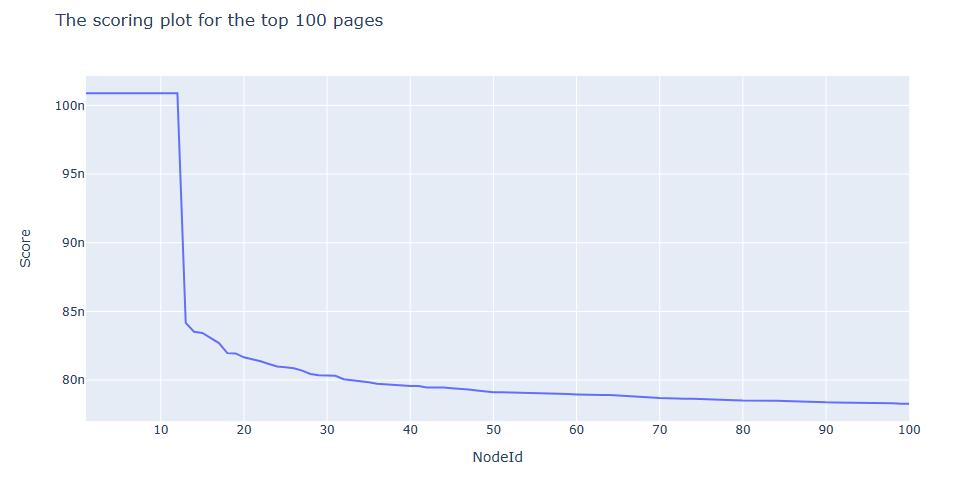